In [1]:
import pandas as pd

In [2]:
# flags and names
d = {'LOCATION': ['AUS', 'CAN', 'DEU', 'ESP', 'FRA', 'GBR', 'GRC', 'IRL', 'ITA', 'JPN', 'NLD', 'RUS', 'USA'],
     'COUNTRY': ['Australia', 'Canada', 'Germany', 'Spain', 'France', 'United Kindom', 'Greece', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'Russia', 'United States'],
     'FLAG': ['https://public.flourish.studio/country-flags/svg/au.svg', #aus
              'https://public.flourish.studio/country-flags/svg/ca.svg', #can
              'https://public.flourish.studio/country-flags/svg/de.svg', #deu
              'https://public.flourish.studio/country-flags/svg/es.svg', #esp
              'https://public.flourish.studio/country-flags/svg/fr.svg', #fra
              'https://public.flourish.studio/country-flags/svg/gb.svg', #gbr
              'https://public.flourish.studio/country-flags/svg/gr.svg', #grc
              'https://public.flourish.studio/country-flags/svg/ie.svg', #irl
              'https://public.flourish.studio/country-flags/svg/it.svg', #ita
              'https://public.flourish.studio/country-flags/svg/jp.svg', #jpn
              'https://public.flourish.studio/country-flags/svg/nl.svg', #nld
              'https://public.flourish.studio/country-flags/svg/ru.svg', #rus
              'https://public.flourish.studio/country-flags/svg/us.svg'  #usa              
              ]}
df_flags = pd.DataFrame(data=d)
df_flags

,LOCATION,COUNTRY,FLAG
0,AUS,Australia,https://public.flourish.studio/country-flags/s...
1,CAN,Canada,https://public.flourish.studio/country-flags/s...
2,DEU,Germany,https://public.flourish.studio/country-flags/s...
3,ESP,Spain,https://public.flourish.studio/country-flags/s...
4,FRA,France,https://public.flourish.studio/country-flags/s...
5,GBR,United Kindom,https://public.flourish.studio/country-flags/s...
6,GRC,Greece,https://public.flourish.studio/country-flags/s...
7,IRL,Ireland,https://public.flourish.studio/country-flags/s...
8,ITA,Italy,https://public.flourish.studio/country-flags/s...
9,JPN,Japan,https://public.flourish.studio/country-flags/s...


In [3]:
df_housing = pd.read_csv('real_housing_prices.csv')

In [4]:
df_housing.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HOUSECOST,REAL,IDX2015,Q,1970-Q1,26.035832,NaN
1,AUS,HOUSECOST,REAL,IDX2015,Q,1970-Q2,26.407057,NaN
2,AUS,HOUSECOST,REAL,IDX2015,Q,1970-Q3,26.930980,NaN
3,AUS,HOUSECOST,REAL,IDX2015,Q,1970-Q4,26.979681,NaN
4,AUS,HOUSECOST,REAL,IDX2015,Q,1971-Q1,27.176670,NaN


In [5]:
df = df_housing[['LOCATION', 'TIME', 'Value']]

In [6]:
df.head()

,LOCATION,TIME,Value
0,AUS,1970-Q1,26.035832
1,AUS,1970-Q2,26.407057
2,AUS,1970-Q3,26.930980
3,AUS,1970-Q4,26.979681
4,AUS,1971-Q1,27.176670


In [7]:
# get data from 1970
df = df[df['TIME'] > '1969-Q4']

In [8]:
# normalization

df['Value'] = (df.Value / df['Value'].where(df.TIME.str[5:] =='Q1').groupby(df['LOCATION']).transform('first')) * 100

In [9]:
#df['Value'] / df.groupby('LOCATION')['Value'].transform('first')

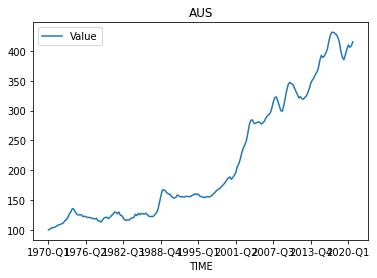

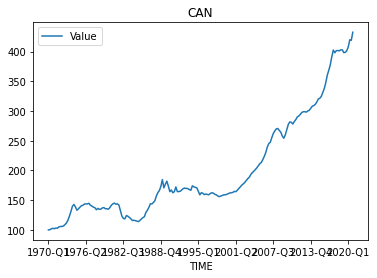

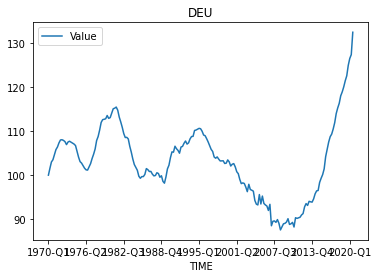

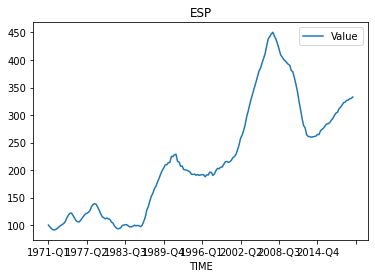

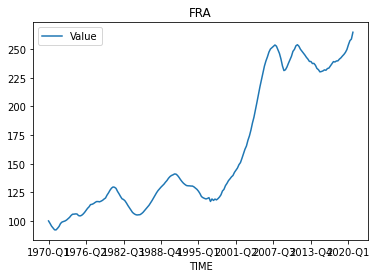

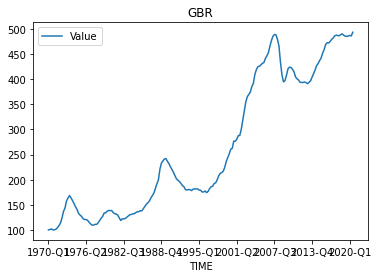

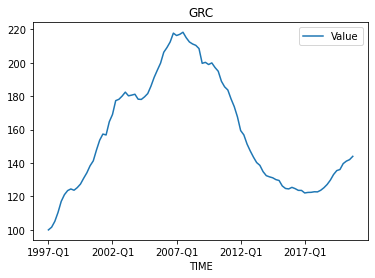

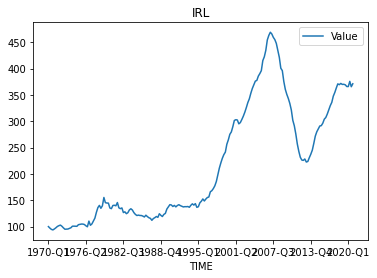

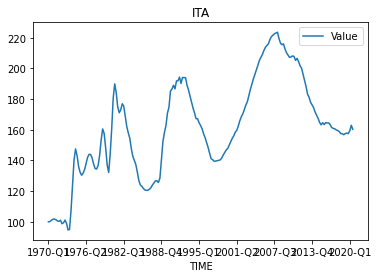

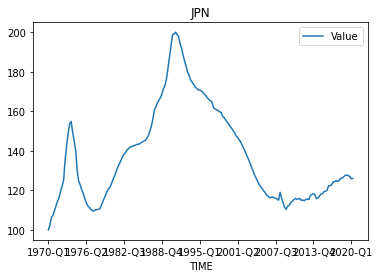

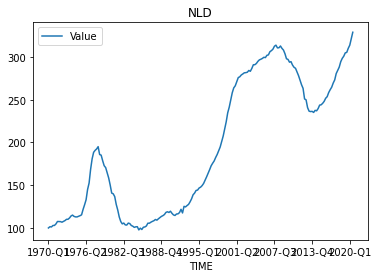

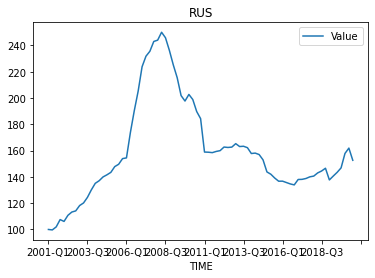

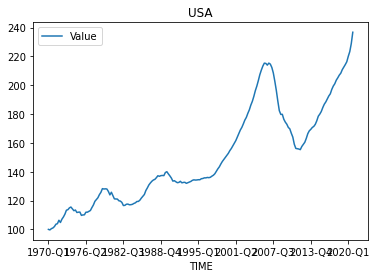

In [10]:
import matplotlib.pyplot as plt

for title, group in df.groupby('LOCATION'):
    group.plot(x='TIME', y='Value', title=title)

In [11]:
df_out = df.pivot_table(index='LOCATION', columns='TIME', values='Value').reset_index()

In [12]:
df_out = df_flags.merge(df_out, on='LOCATION', how='right')

In [13]:
df_out.head(20)

,LOCATION,COUNTRY,FLAG,1970-Q1,1970-Q2,1970-Q3,1970-Q4,1971-Q1,1971-Q2,1971-Q3,1971-Q4,1972-Q1,1972-Q2,1972-Q3,1972-Q4,1973-Q1,1973-Q2,1973-Q3,1973-Q4,1974-Q1,1974-Q2,1974-Q3,1974-Q4,1975-Q1,1975-Q2,1975-Q3,1975-Q4,1976-Q1,1976-Q2,1976-Q3,1976-Q4,1977-Q1,1977-Q2,1977-Q3,1977-Q4,1978-Q1,1978-Q2,1978-Q3,1978-Q4,1979-Q1,...,2011-Q1,2011-Q2,2011-Q3,2011-Q4,2012-Q1,2012-Q2,2012-Q3,2012-Q4,2013-Q1,2013-Q2,2013-Q3,2013-Q4,2014-Q1,2014-Q2,2014-Q3,2014-Q4,2015-Q1,2015-Q2,2015-Q3,2015-Q4,2016-Q1,2016-Q2,2016-Q3,2016-Q4,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4
0,AUS,Australia,https://public.flourish.studio/country-flags/s...,100.0,101.425824,103.438140,103.625191,104.381799,105.516414,107.385789,108.496935,109.317985,110.486440,111.894898,115.619051,117.310695,121.011347,126.999457,130.404397,135.762539,134.512429,129.837968,126.184475,125.055506,125.353048,125.409741,122.326581,122.873483,122.315323,120.847673,120.954394,120.527774,119.747693,118.849939,118.534801,119.444734,115.450533,115.066384,113.212613,116.220900,...,338.670949,332.540492,327.303514,321.147073,323.385467,320.092591,318.967088,321.960965,324.491128,329.565798,337.062726,345.926935,351.110355,354.535912,360.443812,364.131552,370.810797,383.926757,392.480605,389.126061,391.553854,396.245491,402.554686,415.480572,425.865112,431.303540,431.141820,429.609545,427.306050,423.013159,415.376295,399.903152,389.590397,385.085861,392.862133,402.351724,410.065172,406.108563,408.214651,415.165731
1,CAN,Canada,https://public.flourish.studio/country-flags/s...,100.0,100.430225,101.891005,102.693688,102.001638,103.173846,102.828153,105.217415,105.701518,105.830839,106.550023,108.801556,111.658259,116.204826,123.218479,130.852053,139.698591,142.803779,138.903077,133.098685,135.279188,138.234002,140.627755,141.444896,143.412355,143.809615,143.740267,144.791820,141.559013,140.042437,138.353389,137.352983,133.883219,136.193390,134.677606,134.910850,137.087034,...,282.279055,285.569548,289.957046,291.625141,294.292804,297.561345,298.776438,298.810784,298.136588,300.015345,301.236621,304.599979,308.068550,309.140243,311.218428,315.092046,320.209755,321.407612,324.586975,330.960269,337.748398,347.859337,360.241486,368.551432,377.722312,391.136024,402.497860,397.954359,401.447387,401.708231,401.185431,402.829194,402.822362,398.213251,398.681874,401.319676,407.880212,419.868045,418.811201,432.461154
2,DEU,Germany,https://public.flourish.studio/country-flags/s...,100.0,101.556598,102.986186,103.496216,104.648696,105.797591,106.380913,107.313086,107.972812,108.029523,107.873451,107.592158,106.917629,107.504955,107.688923,107.471900,107.272775,107.048830,106.700264,105.347654,104.082205,103.068939,102.731273,102.167398,101.574106,101.200806,101.148185,101.895152,102.626154,103.775989,104.750566,105.928587,107.851836,108.761067,110.222144,111.938037,112.581312,...,90.353647,90.200936,90.332985,90.463397,90.981116,91.292753,92.809051,93.554135,93.137679,94.068477,93.958512,93.884672,94.611560,95.765860,96.436589,96.522233,98.358749,99.301958,100.124018,101.415378,104.201429,105.822325,107.498897,108.709562,109.302209,110.458380,111.888843,113.951877,115.231347,116.270826,117.984861,118.870944,120.006293,121.389272,122.515241,124.888047,126.450415,127.311547,132.387782,NaN
3,ESP,Spain,https://public.flourish.studio/country-flags/s...,NaN,NaN,NaN,NaN,100.000000,96.775676,93.403690,91.548335,91.240428,92.538911,94.619859,97.247864,99.124133,100.835836,102.992064,106.666669,113.205860,118.067997,121.686080,121.727998,117.372928,112.593798,108.116333,105.931916,105.820842,108.929432,112.993813,116.763796,120.022442,121.637134,123.030543,126.332748,133.287193,137.199881,138.881176,138.011117,133.047112,...,367.759699,355.992876,342.569698,325.226640,310.494240,294.211166,281.052094,276.507379,264.453679,260.945156,260.833277,259.635156,260.455840,260.931835,261.796977,264.590059,264.560882,271.333941,273.964801,276.4

In [14]:
df_out.to_csv('out_housing.csv')